<a href="https://colab.research.google.com/github/sagar-demo/Deep-Learning/blob/master/Stock_Price_prediction_And_Forecasting_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
####Stock Market Prediction And ForeCasting Using Stacked LSTM

In [2]:
### Data Collection
import pandas_datareader as pdr

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
df=pdr.get_data_tiingo('AAPL',api_key='6e89d8ac63b59b06c653d837553b519ede47b005')

In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('AAPL.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-08-12 00:00:00+00:00,115.24,115.42,109.63,112.53,101685610,106.479554,106.645871,101.296022,103.975566,101685610,0.0,1.0
1,AAPL,2015-08-13 00:00:00+00:00,115.15,116.40,114.54,116.04,48535789,106.396396,107.551372,105.832768,107.218739,48535789,0.0,1.0
2,AAPL,2015-08-14 00:00:00+00:00,115.96,116.31,114.01,114.32,42929516,107.144821,107.468214,105.343058,105.629492,42929516,0.0,1.0
3,AAPL,2015-08-17 00:00:00+00:00,117.16,117.65,115.50,116.04,40884745,108.253598,108.706348,106.719789,107.218739,40884745,0.0,1.0
4,AAPL,2015-08-18 00:00:00+00:00,116.50,117.44,116.01,116.43,34560708,107.643770,108.512312,107.191020,107.579092,34560708,0.0,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2020-08-03 00:00:00+00:00,435.75,446.5457,431.57,432.80,77037847,434.947532,445.723351,430.775230,432.002964,77037847,0.00,1.0
1253,AAPL,2020-08-04 00:00:00+00:00,438.66,443.1600,433.55,436.53,43198092,437.852173,442.343886,432.751583,435.726095,43198092,0.00,1.0
1254,AAPL,2020-08-05 00:00:00+00:00,440.25,441.5700,435.59,437.51,30497988,439.439245,440.756814,434.787826,436.704291,30497988,0.00,1.0
1255,AAPL,2020-08-06 00:00:00+00:00,455.61,457.6500,439.19,441.62,50607225,454.770958,456.807201,438.381197,440.806722,50607225,0.00,1.0
1256,AAPL,2020-08-07 00:00:00+00:00,444.45,454.7000,441.17,452.82,49511403,444.450000,454.700000,441.170000,452.820000,49511403,0.82,1.0


In [9]:
df1=df.reset_index()['close']

In [10]:
df1.shape

(1257,)

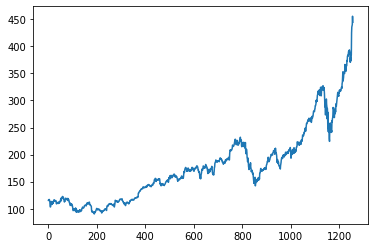

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
### LSTM are sensitive to the scale of the data.so we apply  MINMAX scaler
import numpy as  np

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.06816875]
 [0.06792236]
 [0.0701399 ]
 ...
 [0.95794891]
 [1.        ]
 [0.96944726]]


In [15]:
df1.shape

(1257, 1)

In [16]:
### Spliting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(817, 440)

In [18]:
train_data

array([[0.06816875],
       [0.06792236],
       [0.0701399 ],
       [0.07342514],
       [0.07161825],
       [0.06753908],
       [0.06107811],
       [0.04221535],
       [0.03498782],
       [0.03668519],
       [0.05297451],
       [0.06181729],
       [0.06283024],
       [0.06137925],
       [0.04758124],
       [0.06022942],
       [0.05483615],
       [0.05182468],
       [0.06014729],
       [0.05423385],
       [0.06085909],
       [0.06534892],
       [0.06836039],
       [0.07101596],
       [0.07137186],
       [0.06455499],
       [0.06326827],
       [0.06808662],
       [0.06313138],
       [0.06565007],
       [0.0675117 ],
       [0.06671777],
       [0.06050319],
       [0.05124976],
       [0.05368631],
       [0.05267336],
       [0.05486353],
       [0.05595861],
       [0.05740959],
       [0.05595861],
       [0.05245435],
       [0.05962713],
       [0.05820352],
       [0.05872368],
       [0.05439812],
       [0.05891532],
       [0.05667041],
       [0.058

In [19]:
## convert  an array of value into a dataset matrix
import numpy
def create_data(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]  #### i=0,0,1,2,3---------99 100
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
  
  return numpy.array(dataX), numpy.array(dataY)
 

In [20]:
# reshape into X=t ,t+1,t+2,t+3 and y=t+4
time_step=100
X_train,y_train=create_data(train_data,time_step)
X_test,ytest=create_data(test_data,time_step)

In [21]:
print(X_train)

[[0.06816875 0.06792236 0.0701399  ... 0.04648616 0.0408465  0.04109289]
 [0.06792236 0.0701399  0.07342514 ... 0.0408465  0.04109289 0.03386536]
 [0.0701399  0.07342514 0.07161825 ... 0.04109289 0.03386536 0.02836258]
 ...
 [0.27908123 0.27475566 0.27502943 ... 0.33372574 0.3366277  0.35184932]
 [0.27475566 0.27502943 0.26966354 ... 0.3366277  0.35184932 0.36104799]
 [0.27502943 0.26966354 0.26938977 ... 0.35184932 0.36104799 0.32069428]]


In [22]:
print(X_train.shape),print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [23]:
print(X_test.shape),print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [24]:
##  reshape input to be[sample, time step,features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)


In [25]:
###  Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 4s 301ms/step - loss: 0.0117 - val_loss: 0.0531
Epoch 2/100
12/12 [==============================] - 2s 207ms/step - loss: 0.0027 - val_loss: 0.0030
Epoch 3/100
12/12 [==============================] - 2s 208ms/step - loss: 7.7005e-04 - val_loss: 0.0025
Epoch 4/100
12/12 [==============================] - 3s 230ms/step - loss: 4.6673e-04 - val_loss: 0.0066
Epoch 5/100
12/12 [==============================] - 3s 214ms/step - loss: 3.4086e-04 - val_loss: 0.0044
Epoch 6/100
12/12 [==============================] - 3s 219ms/step - loss: 3.2685e-04 - val_loss: 0.0028
Epoch 7/100
12/12 [==============================] - 3s 249ms/step - loss: 2.8118e-04 - val_loss: 0.0031
Epoch 8/100
12/12 [==============================] - 3s 223ms/step - loss: 2.7845e-04 - val_loss: 0.0033
Epoch 9/100
12/12 [==============================] - 3s 231ms/step - loss: 2.7131e-04 - val_loss: 0.0035
Epoch 10/100
12/12 [==============================] - 3s 221ms/

In [29]:
import tensorflow as tf

In [30]:
tf.__version__

'2.3.0'

In [31]:
### lets do the prediction and check perfomance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [32]:
### Transform to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [33]:
###  calculate RMSE perfomance metrics
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

149.8626394689172

In [34]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

261.25123791376035

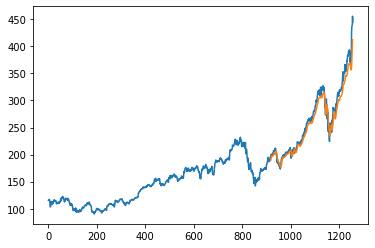

In [35]:
### plotting 
# shifitng train predictions for plotting
look_back=100
trainPredictPlot=numpy.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
## shifitng test predictions for plotting
testPredictPlot=numpy.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
### Plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(testPredictPlot)
plt.show()

In [36]:
len(test_data)

440

In [37]:
X_input=test_data[341:].reshape(1,-1)
X_input.shape

(1, 99)

In [38]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()

In [39]:
temp_input

[0.4228105237221782,
 0.3802666520655954,
 0.3669340487858297,
 0.42855969556766227,
 0.42483642237249164,
 0.46020751772661317,
 0.43091411832343207,
 0.45026966353656206,
 0.44884605907958497,
 0.4122156213212145,
 0.42322117885399846,
 0.4135844717606154,
 0.47124045226818534,
 0.4629178415966272,
 0.48109617543187233,
 0.48635256111917213,
 0.5007528677416706,
 0.538533139869138,
 0.5313603635666767,
 0.5375475675527692,
 0.5268979111342296,
 0.5108276069756619,
 0.48739288745311693,
 0.5085553152462563,
 0.505625975305938,
 0.5273633202836259,
 0.5279108604593863,
 0.515344813425685,
 0.5403947764667233,
 0.5570126208010513,
 0.5440632956443179,
 0.5552604922386181,
 0.5673063761053467,
 0.5757111178032689,
 0.584225367536343,
 0.6017192761518877,
 0.6150792564404414,
 0.6052235332767543,
 0.5949297779724587,
 0.6001040326333946,
 0.5950940400251868,
 0.6149423713965012,
 0.6099597557970816,
 0.6266323541489858,
 0.6201166260574371,
 0.6257015358501931,
 0.6197881019519809,
 0.623

In [62]:
### Demonstrate prediction for next 10 Days
from numpy import array
lst_out=[]
n_steps=100
i=0
while(i<30):

  if (len(temp_input)>100):
   
    # Print(temp_input)
    X_input=np.array(temp_input[1:])
    print("{} day input {} ".format(i,X_input))
    X_input=X_input.reshape(1,-1)
    X_input=X_input.reshape((1,n_steps,-1))
    #print(X_input)
    yhat=model.predict(X_input,verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    #print(temp_input)
    lst_ouput.extend(yhat.tolist())
    i=i+1
  else:
    X_input=X_input.reshape((1,n_steps,-1))
    yhat=model.predict(X_input,verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1
print(lst_output)

  



    

ValueError: ignored